# 1. Business understanding
This obesity classification project aims to develop predictive models to identify factors contributing to different weight categories, with a focus on gender-specific patterns and risk factors. By analyzing these patterns separately for men and women, we can gain deeper insights into how obesity develops and progresses differently across genders. This information can be used to develop targeted interventions and prevention strategies to address the obesity epidemic more effectively.

**Objectives**

Identify Key Predictors
    Determine the most influential factors contributing to obesity across different weight categories.
    Analyze the relationship between lifestyle choices (e.g., diet, physical activity) and obesity risk.

Understand Gender Differences
    Quantify and explain how obesity risk factors differ between men and women.
    Examine whether certain factors (e.g., eating habits, exercise frequency) impact men and women differently.

Improve Risk Assessment
    Building a predictive model to predict obesity based on if a family member has suffered or suffers from overweight.
    Associate rule mining to find the most common patterns in the data.

**Requirements**

Data:
    Obesity dataset containing demographic, dietary, and physical activity information.
    Gender-specific data points for comparative analysis.

Tools & Technologies:
    Python, Jupyter Notebook, scikit-learn, pandas, matplotlib, seaborn.

Machine Learning Models:
    Decision Tree Classifier
    Random Forest Classifier
    Logistic Regression

Evaluation Metrics:
    Accuracy, precision, recall, confusion matrix.

Visualizations:
    Histograms to explore variable distributions.
    Bar plots to compare obesity risk factors across genders.
    Confusion matrices to evaluate model performance.

# 2. Data Understanding

The dataset includes data for the estimation of obesity levels in individuals from Mexico, Peru, and Colombia, based on their eating habits and physical condition. It contains 17 features and 2111 samples. It is important to note that 23% of the data was collected directly from individuals, while the remaining 77% was generated synthetically using the Weka tool.

The dataset is obtained from:  
[https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

### Features and Survey Questions

- **Gender**: What is your gender? (Female, Male)  
- **Age**: What is your age? (Numeric value)  
- **Height**: What is your height? (Numeric value in meters)  
- **Weight**: What is your weight? (Numeric value in kilograms)  
- **FHWO**: Has a family member suffered or suffers from overweight? (Yes, No)  
- **FAVC**: Do you eat high caloric food frequently? (Yes, No)  
- **FCVC**: Do you usually eat vegetables in your meals? (1-3) (Never, Sometimes, Always)  
- **NCP**: How many main meals do you have daily? (1-3) (Between 1-2, Three, More than three)  
- **CAEC**: Do you eat any food between meals? (0-3) (No, Sometimes, Frequently, Always)  
- **SMOKE**: Do you smoke? (Yes, No)  
- **CH2O**: How much water do you drink daily? (1-3) (Less than a liter, Between 1 and 2 L, More than 2 L)  
- **SCC**: Do you monitor the calories you eat daily? (Yes, No)  
- **FAF**: How often do you have physical activity? (0-3) (I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days)  
- **TUE**: How much time do you use technological devices such as cell phone, videogames, television, computer, and others? (0-2) (0–2 hours, 3–5 hours, More than 5 hours)  
- **CALC**: How often do you drink alcohol? (0-3) (I do not drink, Sometimes, Frequently, Always)  
- **MTRANS**: Which transportation do you usually use? (Automobile, Motorbike, Bike, Public Transportation, Walking)  
- **NObeyesdad**: (0-6) (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

The data contains no outliers or missing values.


# 3. Data Preparation
Categorical and binary columns are transformed into numerical values to enable the use of machine learning models. The following encoding methods are applied:

- **Binary variables** (e.g., `Gender`, `SMOKE`) are encoded using **Label Encoding**, mapping categories as follows:
  - `Gender`: Male → 1, Female → 0
  - `SMOKE`: No → 0, Yes → 1

- **Categorical variables** with multiple categories (e.g., `MTRANS`) are encoded using **Ordinal Encoding**, preserving their natural order.

After encoding all categorical data, the encoded values are converted to integers to enhance model efficiency.

In [56]:
import pandas as pd
df = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [57]:
df['Gender'] = df['Gender'].replace({'Female': '0', 'Male': '1'})
df.rename(columns={'family_history_with_overweight': 'FHWO'}, inplace=True)
df['FHWO'] = df['FHWO'].replace({'no': '0', 'yes': '1'})
df['FAVC'] = df['FAVC'].replace({'no': '0', 'yes': '1'})
df['SMOKE'] = df['SMOKE'].replace({'no': '0', 'yes': '1'})
df['SCC'] = df['SCC'].replace({'no': '0', 'yes': '1'})
df['CALC'] = df['CALC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['MTRANS'] = df['MTRANS'].replace({'Walking': '0', 'Bike': '1', 'Motorbike': '2', 'Public_Transportation': '3', 'Automobile': '4'})
df['CAEC'] = df['CAEC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': '0', 'Normal_Weight': '1', 'Overweight_Level_I': '2', 'Overweight_Level_II': '3', 'Obesity_Type_I': '4', 'Obesity_Type_II': '5', 'Obesity_Type_III': '6'})

df['Gender'] = df['Gender'].astype(int)
df['FHWO'] = df['FHWO'].astype(int)
df['FAVC'] = df['FAVC'].astype(int)
df['SMOKE'] = df['SMOKE'].astype(int)
df['SCC'] = df['SCC'].astype(int)
df['CALC'] = df['CALC'].astype(int)
df['MTRANS'] = df['MTRANS'].astype(int)
df['CAEC'] = df['CAEC'].astype(int)
df['NObeyesdad'] = df['NObeyesdad'].astype(int)
df.describe(include='all')

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,3.125059,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.676969,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


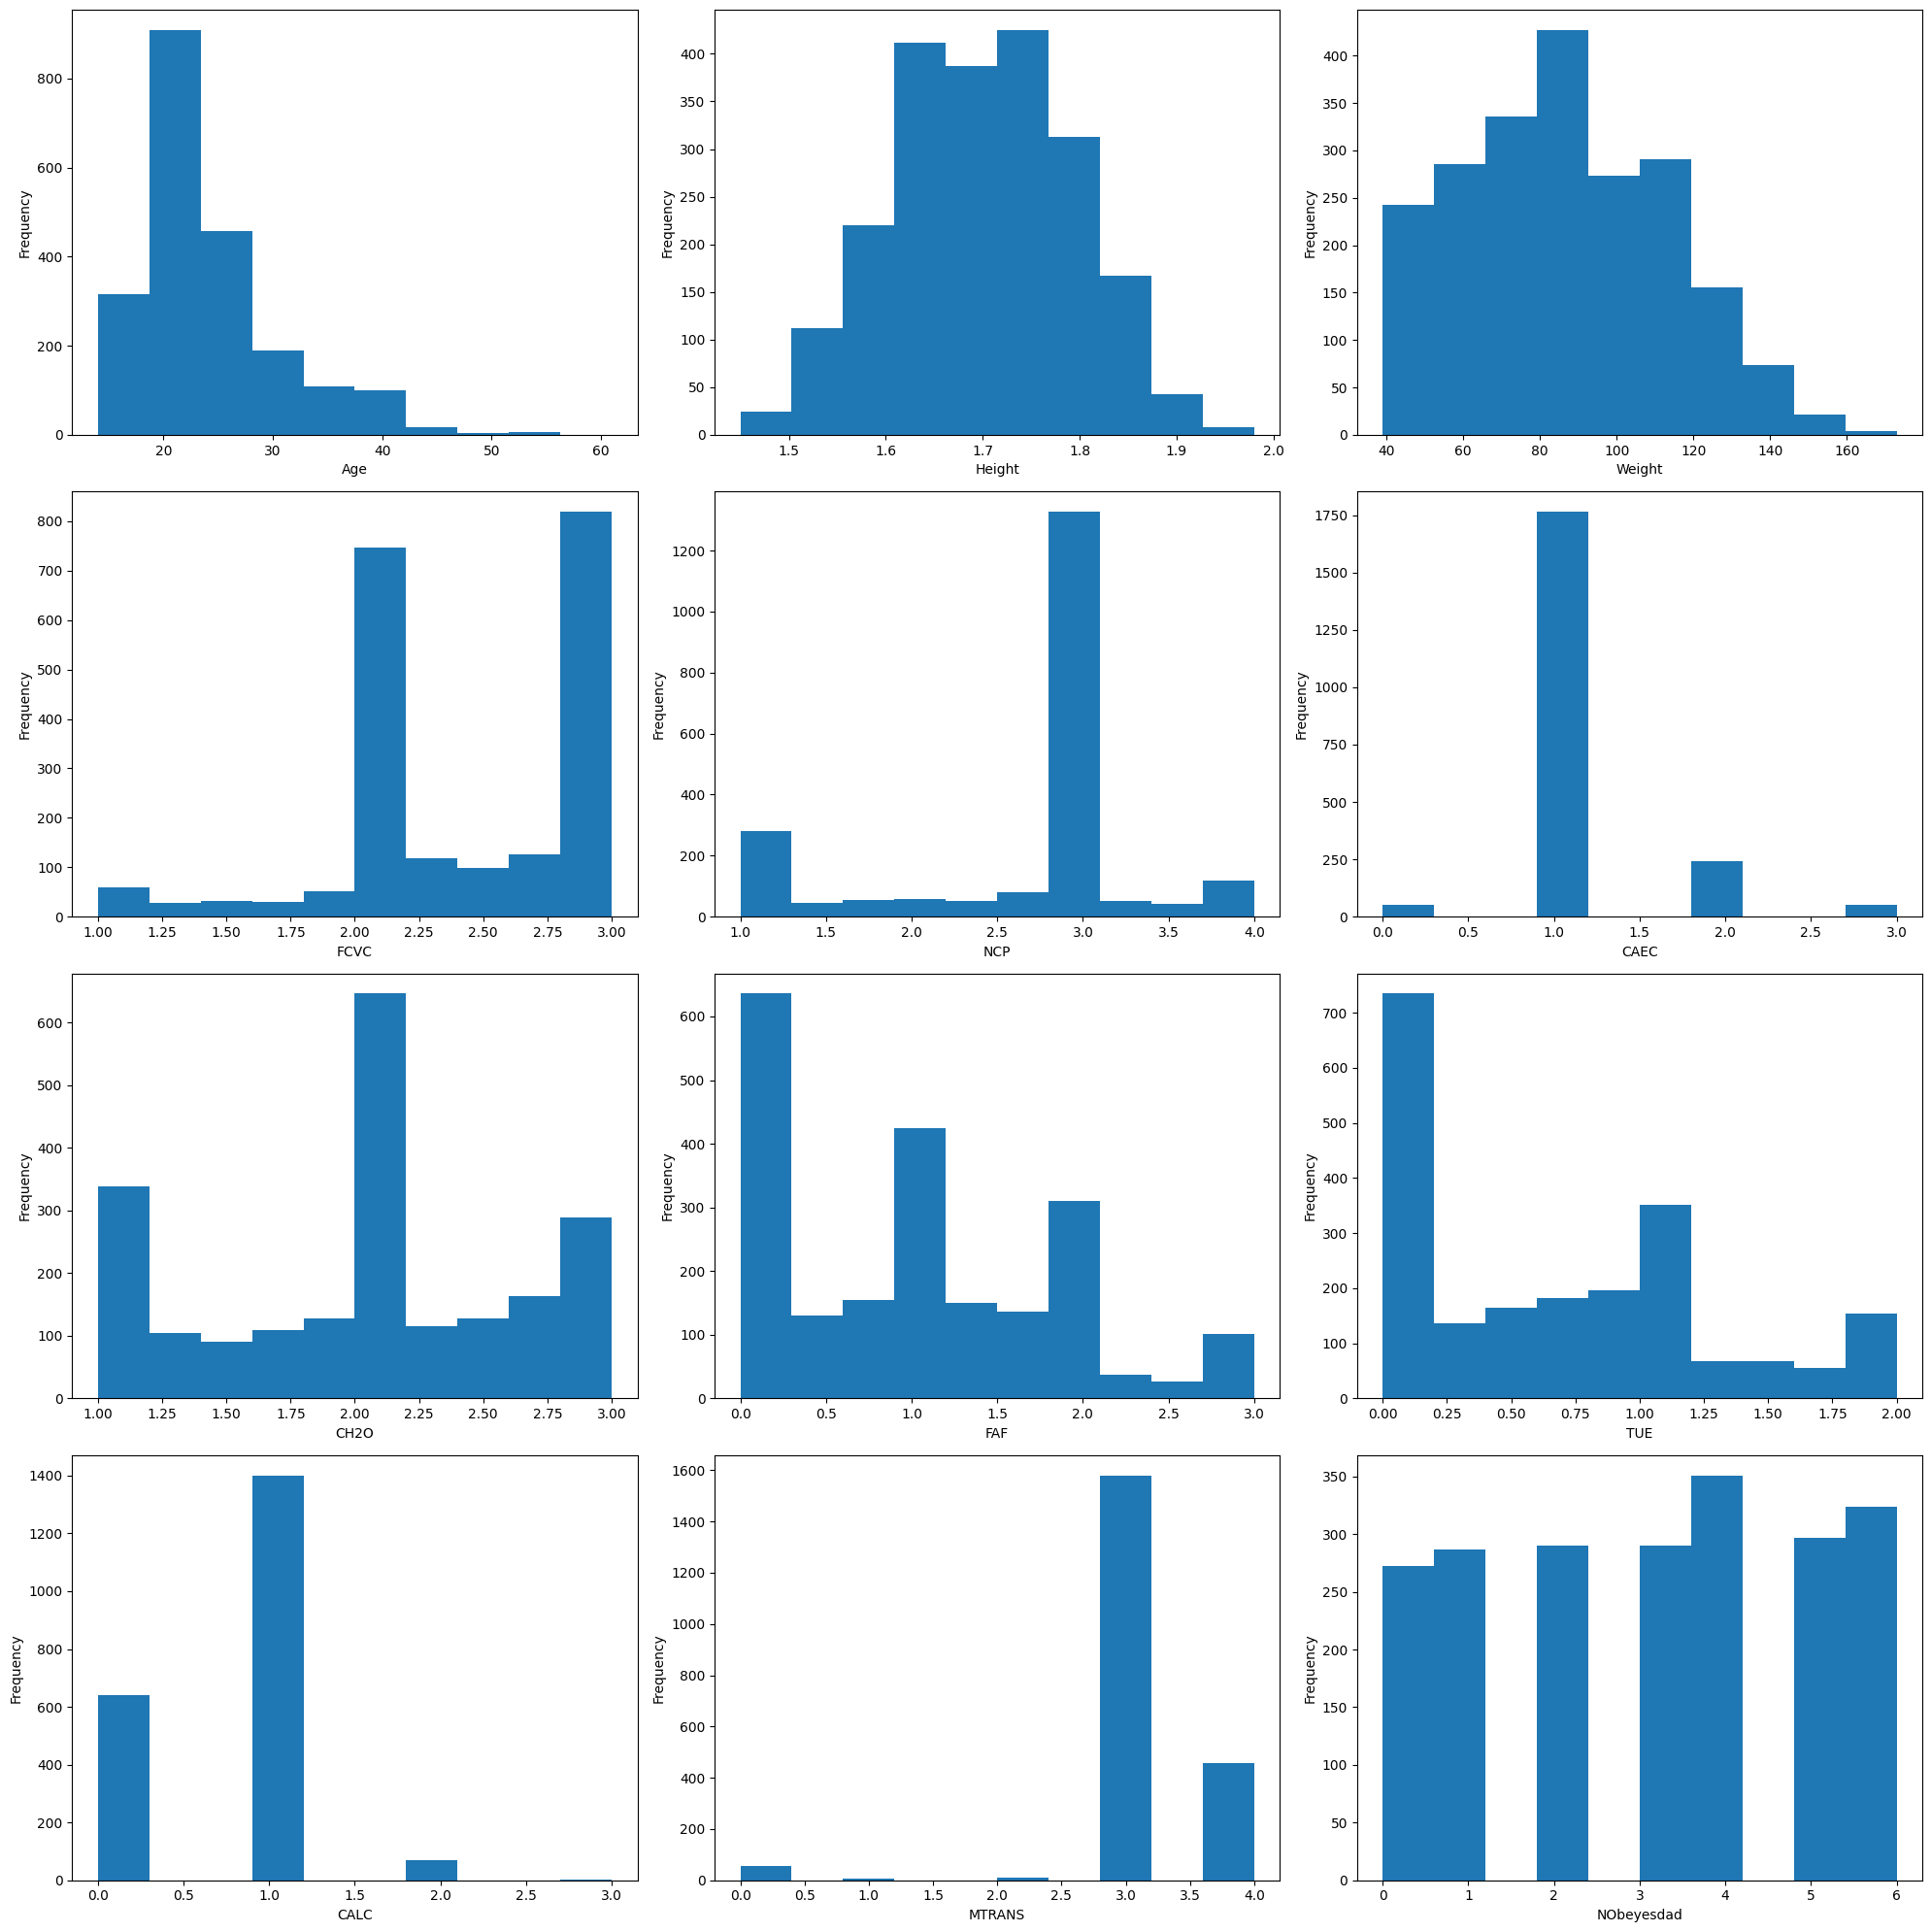

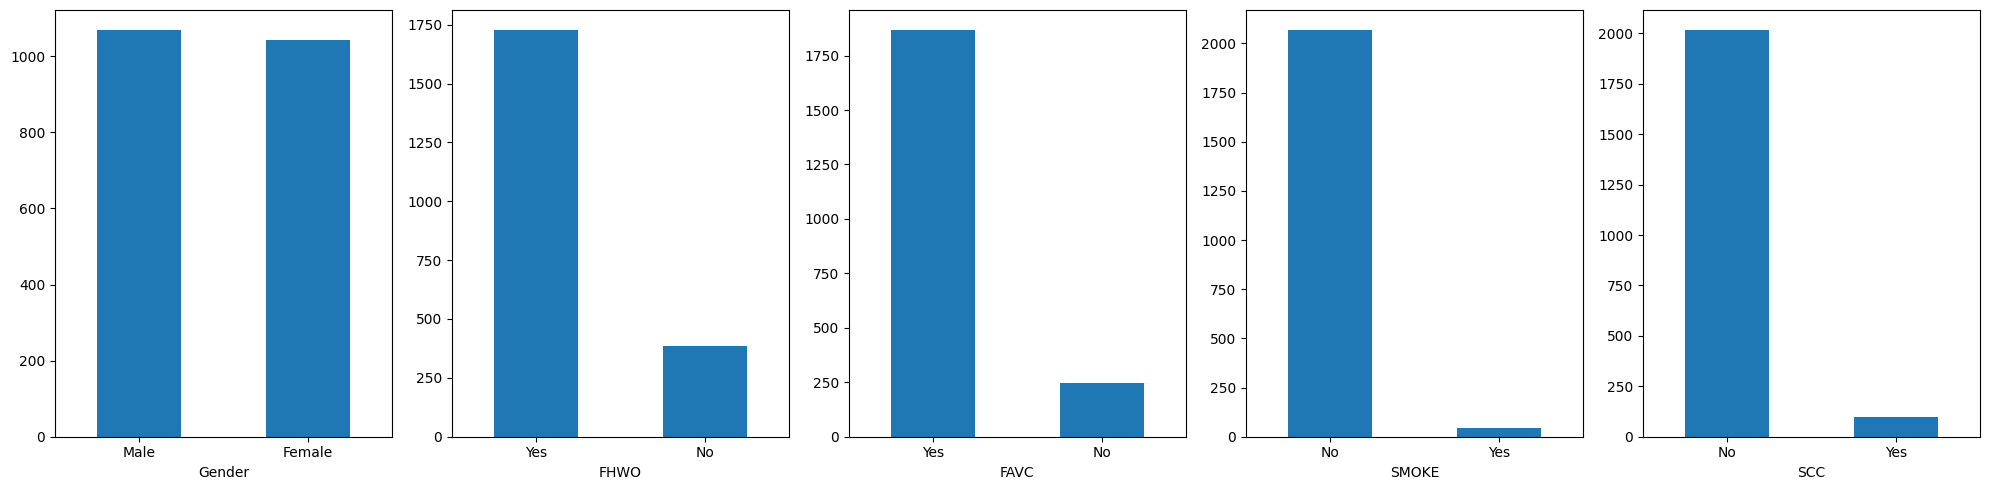

In [58]:
import matplotlib.pyplot as plt

# Non-binary columns
nonbinary_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

# Plotting non-binary columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(nonbinary_cols):
    plt.subplot(4, 3, i + 1)
    df[col].plot(kind='hist')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Binary columns
binary_cols = ['Gender', 'FHWO', 'FAVC', 'SMOKE', 'SCC']
# Convert numerical labels back to categorical for visualization
binary_labels = {
    'Gender': {0: 'Female', 1: 'Male'},
    'FHWO': {0: 'No', 1: 'Yes'},
    'FAVC': {0: 'No', 1: 'Yes'},
    'SMOKE': {0: 'No', 1: 'Yes'},
    'SCC': {0: 'No', 1: 'Yes'}
}

plt.figure(figsize=(20, 5))
for i, col in enumerate(binary_cols):
    plt.subplot(1, 5, i + 1)
    
    value_counts = df[col].replace(binary_labels[col]).value_counts()
    
    value_counts.plot(kind='bar')
    plt.xlabel(col)
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Modeling
The decision tree classifier and random forest classifier were used to predict which obesity group the individual belongs to. Logistic regression was used to predict the probability of a family member having suffered or suffering from overweight.

For predicting obesity groups, only the features related to eating habits were used. Weight and height were excluded as they are directly related to the target variable.

Both the decision tree and random forest were validated using split validation, while logistic regression was validated using cross-validation.

### Parameters used for the models:
- Decision Tree Classifier: max_depth=10
- Random Forest Classifier: n_estimators=100, max_samples=0.7, max_features=0.75 (bootstrap=True by default)
- Logistic Regression: default parameters

### Performance of the models:
The models' performances were evaluated using accuracy, precision, and recall scores. For logistic regression, the confusion matrix was also visualized.

- Decision Tree Classifier: Accuracy: 0.72, Recall: 0.72
- Random Forest Classifier: Accuracy: 0.81, Recall: 0.81
- Logistic Regression: Accuracy: 0.83, Precision: 0.84, Recall: 0.97
- Association rule mining highest support: 0.86, confidence: 0.97


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df2 = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')

df2.drop(['Age', 'Weight', 'Height', 'NCP', 'FCVC', 'FAF', 'TUE', 'CH2O', 'SMOKE', 'family_history_with_overweight'], axis=1, inplace=True)

df_encoded = pd.get_dummies(df2)

frequent_itemsets = apriori(df_encoded, min_support=0.65, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.65)

rules

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt

# Define features and target
X = df.drop(['NObeyesdad', 'Weight', 'Height'], axis=1)
y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.3}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.718
Recall: 0.718


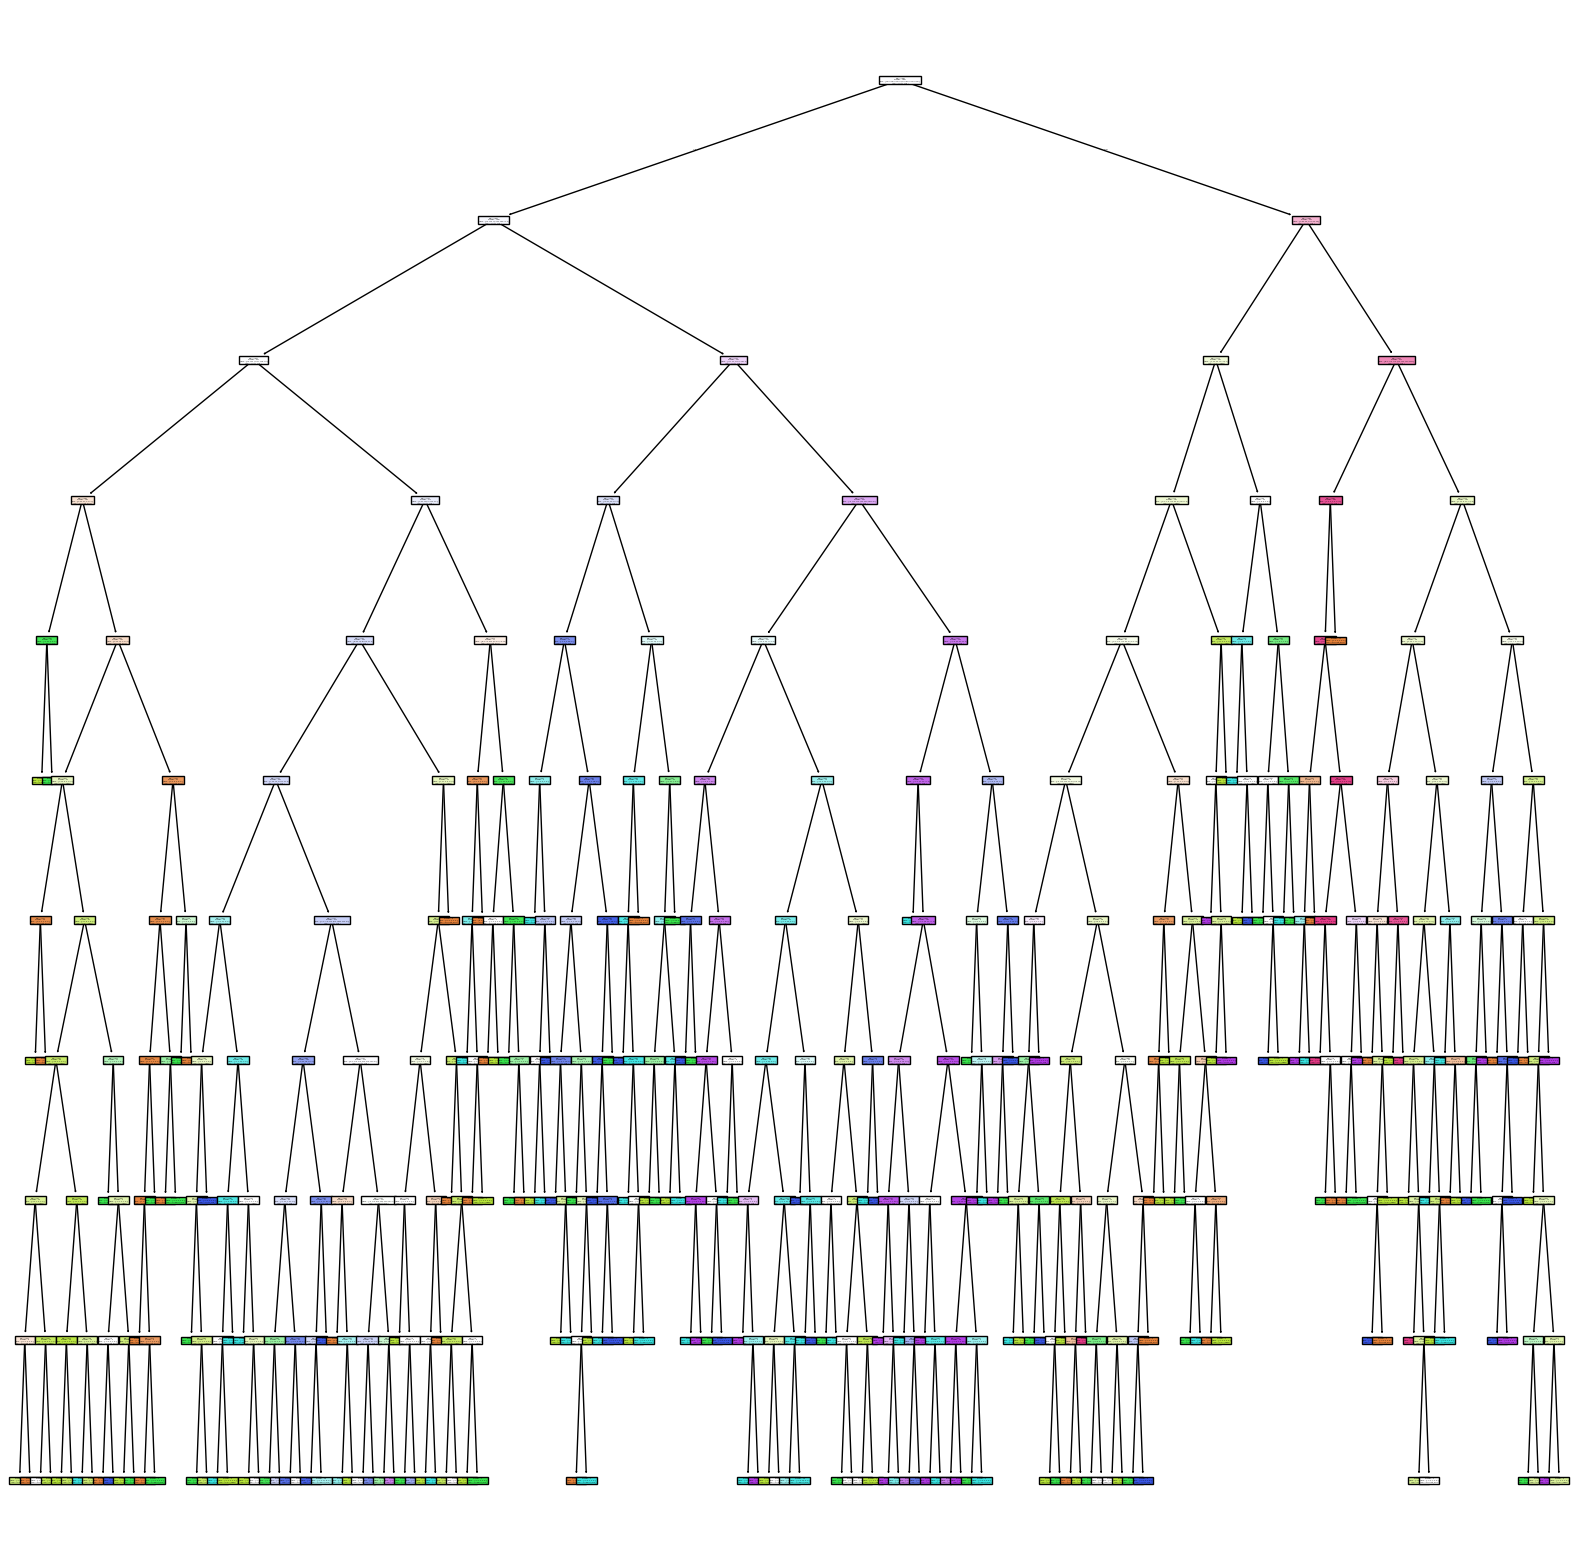

In [60]:
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=X.columns, class_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], filled=True)
plt.show()

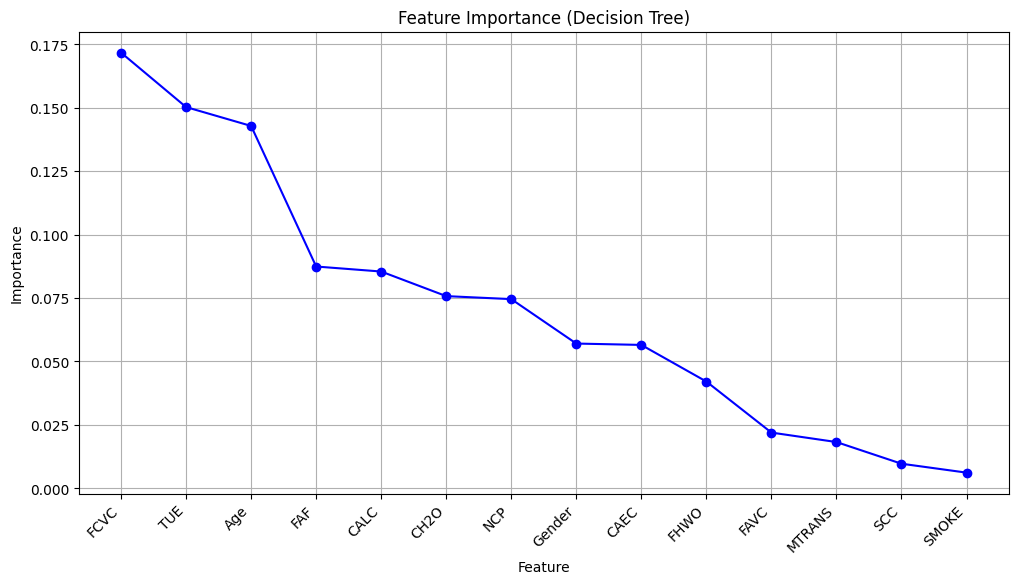

In [61]:
importances = clf.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

top_5_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.plot(feature_importances.sort_values(by='Importance', ascending=False)['Feature'], 
         feature_importances.sort_values(by='Importance', ascending=False)['Importance'], 
         marker='o', linestyle='-', color='b')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Decision Tree)")
plt.grid(True)
plt.show()

In [62]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_samples=0.7, max_features=0.75, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')

print("Random Forest Accuracy:", accuracy)
print("Random Forest Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8125
Random Forest Recall: 0.8125

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        68
           1       0.61      0.64      0.62        78
           2       0.82      0.75      0.78        71
           3       0.84      0.65      0.73        63
           4       0.83      0.81      0.82        94
           5       0.84      0.95      0.89        75
           6       1.00      0.99      0.99        79

    accuracy                           0.81       528
   macro avg       0.81      0.81      0.81       528
weighted avg       0.82      0.81      0.81       528


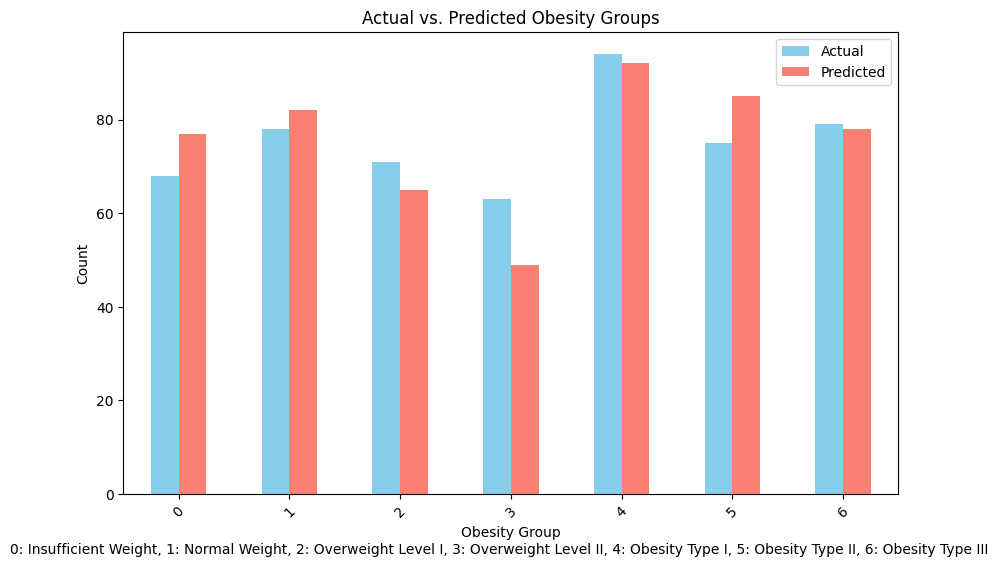

In [63]:
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).fillna(0)

comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel("Obesity Group")
plt.ylabel("Count")
plt.title("Actual vs. Predicted Obesity Groups")
plt.figtext(0.99, 0.01, "0: Insufficient Weight, 1: Normal Weight, 2: Overweight Level I, 3: Overweight Level II, 4: Obesity Type I, 5: Obesity Type II, 6: Obesity Type III", horizontalalignment='right')
plt.xticks(rotation=45)
plt.legend(["Actual", "Predicted"])
plt.show()

In [64]:
importances = rf_clf.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

top_5_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

In [65]:
male_df = df[df['Gender'] == 1]
female_df = df[df['Gender'] == 0]

X_male = male_df.drop(['NObeyesdad', 'Weight', 'Height', 'Gender'], axis=1)
y_male = male_df['NObeyesdad']

X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.25, random_state=42)

male_clf = RandomForestClassifier(n_estimators=100, random_state=42)
male_clf.fit(X_male_train, y_male_train)

y_male_pred = male_clf.predict(X_male_test)
male_accuracy = accuracy_score(y_male_test, y_male_pred)
male_recall = recall_score(y_male_test, y_male_pred, average='weighted')

print("Male Model - Accuracy:", male_accuracy)
print("Male Model - Recall:", male_recall)

male_importances = male_clf.feature_importances_
male_feature_importances = pd.DataFrame({'Feature': X_male.columns, 'Importance': male_importances})
male_feature_importances = male_feature_importances.sort_values(by='Importance', ascending=False)

X_female = female_df.drop(['NObeyesdad', 'Weight', 'Height', 'Gender'], axis=1)
y_female = female_df['NObeyesdad']

X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size=0.25, random_state=42)

female_clf = RandomForestClassifier(n_estimators=100, random_state=42)
female_clf.fit(X_female_train, y_female_train)

y_female_pred = female_clf.predict(X_female_test)
female_accuracy = accuracy_score(y_female_test, y_female_pred)
female_recall = recall_score(y_female_test, y_female_pred, average='weighted')

print("Female Model - Accuracy:", female_accuracy)
print("Female Model - Recall:", female_recall)

Male Model - Accuracy: 0.8314606741573034
Male Model - Recall: 0.8314606741573034
Female Model - Accuracy: 0.8812260536398467
Female Model - Recall: 0.8812260536398467


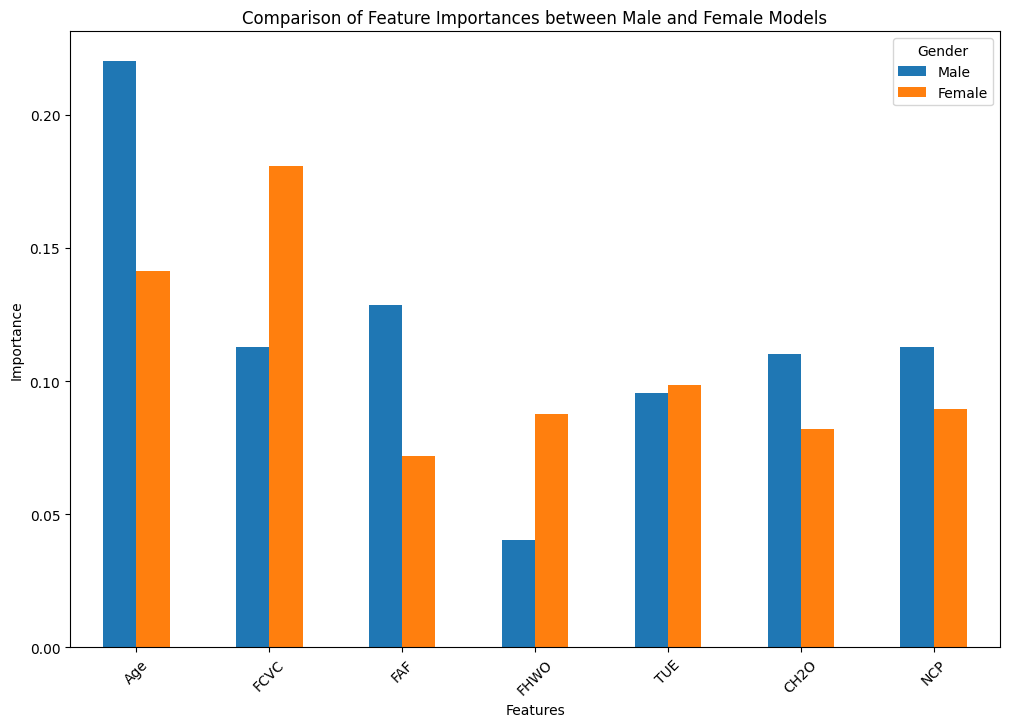

In [66]:
female_importances = female_clf.feature_importances_
female_feature_importances = pd.DataFrame({'Feature': X_female.columns, 'Importance': female_importances})
female_feature_importances = female_feature_importances.sort_values(by='Importance', ascending=False)

top_male = male_feature_importances.head(5)['Feature'].tolist()
top_female = female_feature_importances.head(5)['Feature'].tolist()
all_top = list(set(top_male + top_female))

comparison = pd.DataFrame(index=all_top, columns=['Male', 'Female'])
for feature in all_top:
    if feature in male_feature_importances['Feature'].values:
        comparison.loc[feature, 'Male'] = male_feature_importances[male_feature_importances['Feature'] == feature]['Importance'].values[0]
    else:
        comparison.loc[feature, 'Male'] = 0
    if feature in female_feature_importances['Feature'].values:
        comparison.loc[feature, 'Female'] = female_feature_importances[female_feature_importances['Feature'] == feature]['Importance'].values[0]
    else:
        comparison.loc[feature, 'Female'] = 0
        
comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Feature Importances between Male and Female Models')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

df.drop('NObeyesdad', axis=1, inplace=True)

y = df['FHWO']
X = df.drop(['FHWO', "Weight", "Height"], axis=1)

X = X.astype(float)

In [68]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
reg = LogisticRegression()
reg.fit(X, y)
y_pred = cross_val_predict(estimator=reg, X=X, y=y, cv=50)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

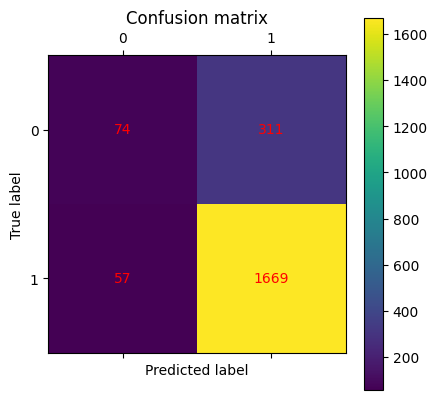

Accuracy: 0.83
Precision: 0.84
Recall: 0.97


In [69]:
# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Accuracy: %0.2f" % accuracy)
print("Precision: %0.2f" % precision)
print("Recall: %0.2f" % recall)

### Interpretation:
- **True Positive (TP)**: The number of correct predictions that an individual has a family history with overweight is **1674**.
- **True Negative (TN)**: The number of correct predictions that an individual does not have a family history with overweight is **47**.
- **False Positive (FP)**: The number of incorrect predictions that an individual has a family history with overweight is **338**.
- **False Negative (FN)**: The number of incorrect predictions that an individual does not have a family history with overweight is **52**.

---

## Accuracy, Precision, and Recall

- **Accuracy**: The ratio of the number of correct predictions to the total number of predictions. The accuracy of the model is **0.82**.
- **Precision**: The ratio of the number of correct positive predictions to the total number of positive predictions. The precision of the model is **0.83**.
- **Recall**: The ratio of the number of correct positive predictions to the total number of actual positive instances. The recall of the model is **0.97**.

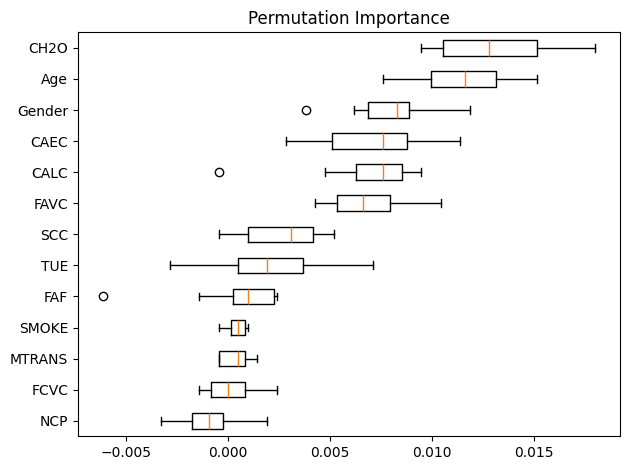

In [70]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X, y, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

## Permutation Importance

The permutation importance shows the importance of each feature in predicting whether a family member suffers or has suffered from overweight.

### The top most important features are:
- **FAVC** (Do you eat high caloric food frequently)
- **CALC** (How often do you drink alcohol)
- **MTRANS** (Which transportation do you usually use)

### The least important features are:
- **FCVC** (Do you usually eat vegetables in your meals)
- **FAF** (How often do you have physical activity)
- **NCP** (How many main meals do you have daily)

From these results, we can conclude that high caloric food consumption and frequency of alcohol consumption indicate a higher probability of overweight in family members. We can also see that physical activity, main meal frequency, and vegetable consumption are less important in determining the probability of overweight in family members.

# 5. Evaluation
Mainly three different metrics are used to evaluate the models: accuracy, recall, and precision. The confusion matrix is also used to visualize the performance of the logistic regression model.

### Model Performance Comparison

| Model                      | Accuracy | Recall  | Precision |
|----------------------------|----------|---------|-----------|
| Decision Tree Classifier   | 0.7178   | 0.7178  | 0.7316    |
| Random Forest Classifier   | 0.8125   | 0.8125  | 0.8153    |
| Logistic Regression        | 0.8257   | 0.9670  | 0.8429    |

The Decision Tree Classifier achieved an accuracy of 71.78%, with similar recall and precision values. This suggests that the model makes balanced predictions, but it may not always generalize well to new data.

The Random Forest Classifier performed better, with 81.25% accuracy, meaning it made correct predictions more often. Since random forests combine multiple decision trees, they tend to handle variability in the data better and reduce overfitting.

The Logistic Regression model had the highest accuracy 82.57% and a very high recall (96.70%). This means it was excellent at identifying positive cases, but since its precision was slightly lower 84.29%, it also had a higher number of false positives.

# 6. Deployment
